# Loan Approval Risk

This notebook will explore a dataset on loan approval risk. Assessing the risk associated with giving loans is important to lenders because they want to minimize the chance of borrowers defaulting on their loans. While the dataset includes labels for both regression (Risk Score) and classification (Loan Approved), this notebook will focus on predicting risk scores.

The dataset was posted on Kaggle by [Lorenzo Zoppelletto.](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval)

## Importing the data

To begin, several libraries are imported, along with the dataset itself: 

In [1]:
# Importing the Data
import os
import pandas as pd
import numpy as np
import kagglehub

# Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import SGD, Adam

pd.options.display.max_columns = 40 # Sets the number of columns shown in Pandas output to 40

path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval") # Downloading from Kaggle
df = pd.read_csv(path + "/Loan.csv") # Assigning the dataset to a \\\dataframe

## Analysis 

In this section some basic analysis is performed, which can help shed some light on the underlying patterns and relationships in the dataset. The analysis section will cover:

* The shape and sub-sample of the dataset
* Visualization of the Risk Score column 
* Visualization of the integer data 
* Visualization of the floating point data
* Exploration of the text data

To begin the analysis, the shape of the dataset is printed below, along with the first five rows:

In [2]:
print("Full Dataset Shape:", df.shape)
df.head()

Full Dataset Shape: (20000, 36)


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In total there are 36 rows, containing integer, float, and string data. Each data type is explored in the following sections. 

#### Risk Score

To begin, the risk score is isolated and visualized in a histogram. The end goal of the models will be to predict risk scores so this will help show what the target column looks like. Summary statistics and the histogram for the Risk Score column are shown below: 

          RiskScore
count  20000.000000
mean      50.766780
std        7.778262
min       28.800000
25%       46.000000
50%       52.000000
75%       56.000000
max       84.000000


array([[<Axes: title={'center': 'RiskScore'}>]], dtype=object)

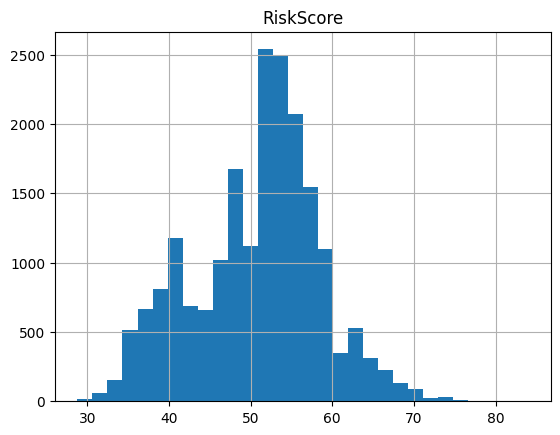

In [3]:
print(df[["RiskScore"]].describe())
df[["RiskScore"]].hist(bins=30)

There are a few high frequency spots, with the highest number of samples centering just above the 50 mark. This means gthat a large number of risk scores will be between 50 and 60. The median of 52 reflects this. 

#### Integer data

The integer columns in this dataset represent whole numbers, as well as some binary (1 or 0) columns that have simply map to true or false, respectively. Below, the integer data is shown:

In [4]:
int_df = df.select_dtypes(["int"])
print("Integer Dataset Shape:", int_df.shape)
int_df.head()

Integer Dataset Shape: (20000, 21)


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,NetWorth,LoanApproved
0,45,39948,617,22,13152,48,2,183,1,2,0,0,29,9,7632,1202,146111,19183,11,126928,0
1,38,39709,628,15,26045,48,1,496,5,3,0,0,21,9,4627,3460,53204,9595,3,43609,0
2,47,40724,570,26,17627,36,2,902,2,0,0,0,20,22,886,895,25176,128874,6,5205,0
3,58,69084,545,34,37898,96,1,755,2,1,0,0,27,10,1675,1217,104822,5370,5,99452,0
4,37,103264,594,17,9184,36,1,274,0,0,0,0,26,27,1555,4981,244305,17286,5,227019,1


In total there are 21 integer columns, 3 of which are binary: BankruptcyHistory, PreviousLoanDefaults, and LoanApproved. These 3 columns will be analyzed seperately, but for now a correlation matrix of all integer columns is shown below, along with the risk score: 

<Axes: >

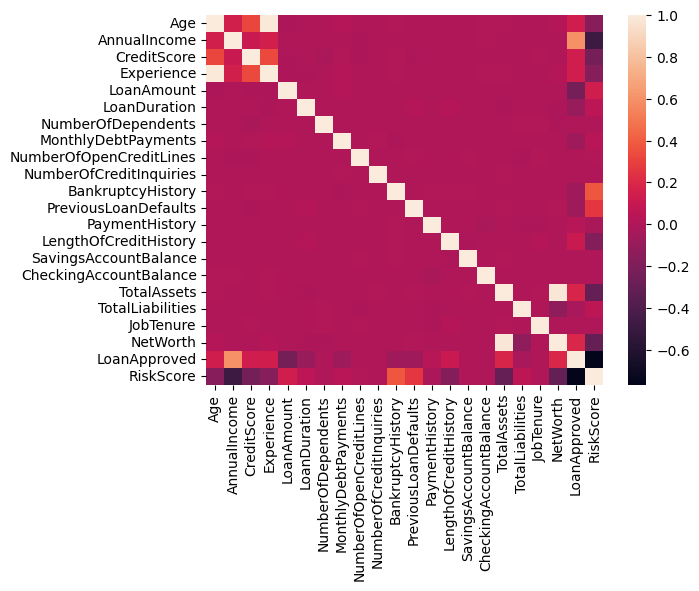

In [6]:
sns.heatmap(pd.concat([int_df, df[["RiskScore"]]], axis=1).corr())

While this chart is able to convey some information, for the most part the outlying correlations are things that could have easily guessed, such as:
* Exerience and age have a very string positive correlation, along with net worth and total assets.
* Annual income, net worth, and loan approval are negatively correlated with risk score.
* Work experience and age have a moderately strong correlation with credit score (generally the older a person gets, the more risk averse they become).

However, the columns generally have a low correlation (positive or negative) with one another. 

#### Binary Columns

The three binary columns (BankruptcyHistory, PreviousLoanDefaults, and LoanApproved) are integer data, but can be viewed in a slightly different way than the rest of the columns. A simple bar chart can shed some light on the ratio of 1s to 0s. Below, bar charts are displayed for each binary column: 

<Axes: title={'center': 'Loan Approved'}, xlabel='LoanApproved'>

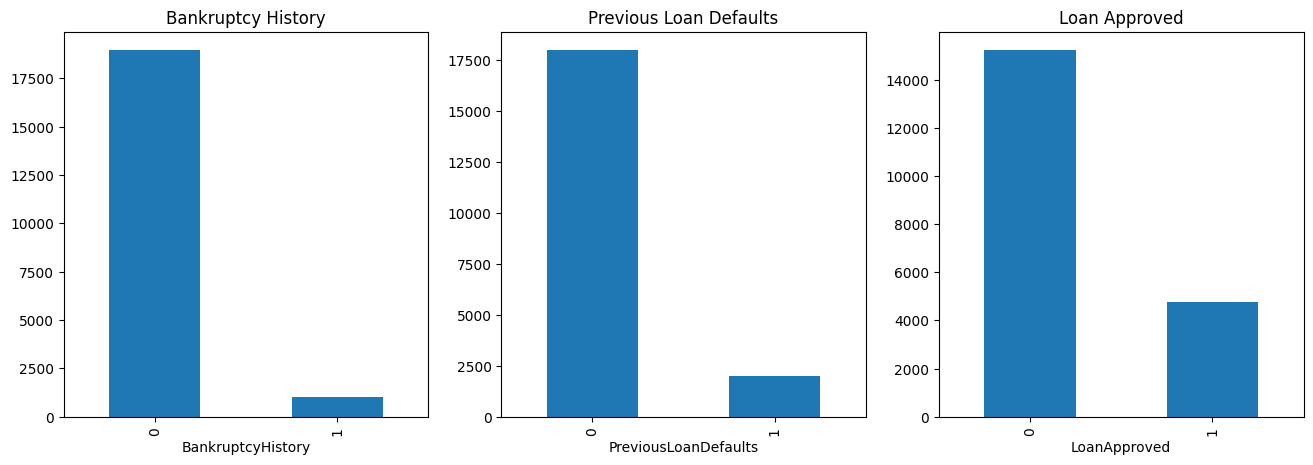

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

df["BankruptcyHistory"].value_counts().plot(ax=axes[0], kind="bar", title="Bankruptcy History")
df["PreviousLoanDefaults"].value_counts().plot(ax=axes[1], kind="bar", title="Previous Loan Defaults")
df["LoanApproved"].value_counts().plot(ax=axes[2], kind="bar", title="Loan Approved")

In each column, the 0s are far more prevelant than the 1s. The low number of 1s in the first two charts mean that most loan applicants have not had a history of bankruptcy and have not previously defaulted on loans. However, the third chart shows that the majority of loans have not been granted. 

This reinforces the low correlation between the LoanApproved and RiskScore seen above; as the risk score increases, the chance of loan approval drop. In general, the two variables move in opposite directions, so a low risk score is more likely to get loan approval than a high score. 

#### Floating Point Data

The 9 floating point columns in the dataset can be split into 3 categories: 
* Money
* Rates/ratios
* Scoring (Risk Score only)

The float columns are shown below: 

In [8]:
float_df = df.select_dtypes(["float"])
print("Float Dataset Shape:", float_df.shape)
float_df.head()

Float Dataset Shape: (20000, 9)


,CreditCardUtilizationRate,DebtToIncomeRatio,MonthlyIncome,UtilityBillsPaymentHistory,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,0.354418,0.358336,3329.000000,0.724972,0.199652,0.227590,419.805992,0.181077,49.0
1,0.087827,0.330274,3309.083333,0.935132,0.207045,0.201077,794.054238,0.389852,52.0
2,0.137414,0.244729,3393.666667,0.872241,0.217627,0.212548,666.406688,0.462157,52.0
3,0.267587,0.436244,5757.000000,0.896155,0.300398,0.300911,1047.506980,0.313098,54.0
4,0.320535,0.078884,8605.333333,0.941369,0.197184,0.175990,330.179140,0.070210,36.0


Just looking at the first 5 rows, notice the different scales of each category:
* The money columns can range anywhere from a few hundred to a few thousand
* The ratio columns are between 0 and 1
* The risk score column is between 30 and 80 (this was observed in the Risk Score section above)

Simply inputting the data from these columns into a model as-is would cause issues because the weights the model assigns to each column would vary greatly. These columns (along with the integer columns) will be scaled in a later section to mitigate this issue. 

Moving on, the correlation matrix for the floating point datais shown below: 

<Axes: >

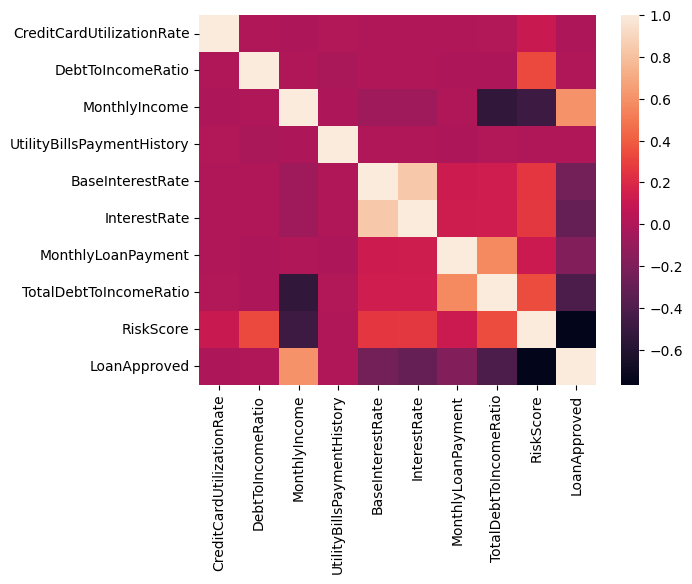

In [9]:
sns.heatmap(pd.concat([float_df, df[["LoanApproved"]]], axis=1).corr())

Notice that the RiskScore column has a noticeable positive correlation with all of the ratio/rate columns except for CreditCardUtilizationRate. Also, MonthlyIncome strong negative correlation with TotalDebtToIncomeRatio and RiskScore. 

#### Text Data

The string data consists of a date column and 5 categorical columns: 

In [10]:
obj_df = df.select_dtypes(["object"])
print("String Dataset Shape:", obj_df.shape)
obj_df.head()

String Dataset Shape: (20000, 6)


,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,2018-01-01,Employed,Master,Married,Own,Home
1,2018-01-02,Employed,Associate,Single,Mortgage,Debt Consolidation
2,2018-01-03,Employed,Bachelor,Married,Rent,Education
3,2018-01-04,Employed,High School,Single,Mortgage,Home
4,2018-01-05,Employed,Associate,Married,Mortgage,Debt Consolidation


While the date column can scaled (like the numerical data), the categorical columns will need to be one-hot encoded in order for the models use them as inputs. Even though the ApplicationDate column is a string, it needs to be converted to a date type column as it will be treated differently from the categorical columns. 

## Preprocessing

In the preprocessing step, data is augmented and transformed in order for it to be used as input to a machine learning model. While most of the topics covered in this sectino were briefly mentioned above, some new processes will be introduced in the section below.

To begin preprocessing, the ApplicationDate columns is transformed to a date type and converted to a numerical value using the following formula for each record in the dataset:

(Current Date - Minimum Date) / (Maximum Date - Minimum Date)

This allows it to be treated like a number (as the date increases, the size of the number increases) while still retaining useful reference data about the date for each record. 

In [11]:
df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"]).dt.date # Converted to date
df["ApplicationDate"] = (df["ApplicationDate"] - df["ApplicationDate"].min()) / (df["ApplicationDate"].max() - df["ApplicationDate"].min())

Now that the ApplicationDate column as been converted to a numeric representation, the data can be split into training, validation, and testing sets. 

> For further reading on [training, validation, and test data sets (Wikipedia).](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets)

To begin, the columns in the data need to be separated into two categories: 
* Features: the items that are used as input into a model
* Target: The output/prediction of the model

Features are used by the mode to predict the label of a given record. The features and target are often refered to as the X data and y data, repectively. Below, the features (X) and label (y) are defined: 

In [12]:
X = df.drop(columns=["LoanApproved", "RiskScore"])
y = df[["RiskScore"]]

Now that the X and y are defined, the records themselves can be split into training, validation, and testing sets. The lengths for each set are: 

* Training: 80% of 20,000 (16,000)
* Validation: 10% of 20,000 (2,000)
* Testing: 10% of 20,000 (2,000)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((16000, 34), (16000, 1), (2000, 34), (2000, 1), (2000, 34), (2000, 1))

With the data split, a pipeline can be made to facilitate the transformation of the datasets. Below, the data types are separated into groups: 

In [14]:
num_cols = list(X_train.select_dtypes(["int", "float"]).drop("ApplicationDate", axis=1).columns)
date_cols = ["ApplicationDate"]
str_cols = list(X_train.select_dtypes(["object"]).columns)

Now each type has a specific transormation applied to it. 
* Numerical Data: a standard scaler is used
* Date Data: a min-max scaler is used
* String Data: a one-hot encoder is used

In [15]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("date", MinMaxScaler(), date_cols),
    ("str", OneHotEncoder(), str_cols)
])

The `full_pipeline` can now be fit using the X_train data. This is done because practice, only the training data would be available. This means that only the data that the model is exposed to during training will have an effect on the transformations that take place.

In [16]:
full_pipeline.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'AnnualIncome', 'CreditScore',
                                  'Experience', 'LoanAmount', 'LoanDuration',
                                  'NumberOfDependents', 'MonthlyDebtPayments',
                                  'CreditCardUtilizationRate',
                                  'NumberOfOpenCreditLines',
                                  'NumberOfCreditInquiries',
                                  'DebtToIncomeRatio', 'BankruptcyHistory',
                                  'PreviousLoanDefaults', 'PaymentHistory',
                                  'LengthOfCredi...
                                  'CheckingAccountBalance', 'TotalAssets',
                                  'TotalLiabilities', 'MonthlyIncome',
                                  'UtilityBillsPaymentHistory', 'JobTenure',
                                  'NetWorth', 'BaseInterestRate',
                                  'InterestRate', 'MonthlyLoanPayment',
                                  'TotalDebtToIncomeRatio']),
                                ('date', MinMaxScaler(), ['ApplicationDate']),
                                ('str', OneHotEncoder(),
                                 ['EmploymentStatus', 'EducationLevel',
                                  'MaritalStatus', 'HomeOwnershipStatus',
                                  'LoanPurpose'])])

The pipeline is now fitted to the training data and is used to transform the training, validation, and testing data: 

In [17]:
X_train = full_pipeline.transform(X_train)
X_val = full_pipeline.transform(X_val)
X_test = full_pipeline.transform(X_test)

The data is now prepared for training neural networks. 

## Model Building

To begin the model building, a baseline model is constructed. It consists of a single dense, 256-unit layer, followed by a batch normalization layer and a dropout layer. The dense layer uses RELU activation: 

In [18]:
model1 = Sequential([

    InputLayer(shape=X_train.shape[1:]),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(1, "relu")

])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 512 (2.00 KB)

The model is then compiled with the following the following parameters:
* Loss: Mean Squared Error (MSE): 
* Optimizer: Stochastic Gradient Descent:
* Metric: Mean Absolute Error (MAE):

In [19]:
model1.compile(loss=MeanSquaredError(), optimizer=SGD(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

Finally, the model is fitted on the training data over 25 epochs: 

In [20]:
model1.fit(X_train, y_train, verbose=0, epochs=25)
model1.evaluate(X_val, y_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3884 - mean_absolute_error: 2.2614 


[8.495150566101074, 2.2075443267822266]

The `model1` has a loss of 9.4 and a Mean Absolute Error of 2.3. Below, several more models are trained. Each will be built in the same process as above, but the code is all in one cell for each. 

The second model is similar to the first, but the dense layer, batch normalization, and dropout layers are duplicated for a total of four groups: 

In [21]:
model2 = Sequential([

    InputLayer(shape=X_train.shape[1:]),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(1, "relu")

])

model2.compile(loss=MeanSquaredError(), optimizer=SGD(learning_rate=0.0001), metrics=[MeanAbsoluteError()])
model2.fit(X_train, y_train, verbose=0, epochs=25)
model2.evaluate(X_val, y_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0231 - mean_absolute_error: 2.0510 


[7.7792134284973145, 2.0311553478240967]

Both the losss and MAE saw a decrease. It seems that adding more layers to the model improved the results, even its only a slight improvement. In the next model, there are still 4 groups, but each group halves the number of units in its dense layer (512, 256, 128, 64). Additionally, the dropout is reduced to 0.2. 

In [22]:
model3 = Sequential([

    InputLayer(shape=X_train.shape[1:]),

    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, "relu")

])

model3.compile(loss=MeanSquaredError(), optimizer=SGD(learning_rate=0.0001), metrics=[MeanAbsoluteError()])
model3.fit(X_train, y_train, verbose=0, epochs=25)
model3.evaluate(X_val, y_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6805 - mean_absolute_error: 2.0629  


[7.06935453414917, 2.0106699466705322]

Although this model's improvement is smaller than the previous, it was still able to beat `model2`'s loss score. 

The final 2 models will do something slighly different than the first 3; the use of SELU activation instead of RELU. SELU activation works particularly well when coupled with batch normalization, so the following models will utilize this activation. `model4` still consists of 4 groups, the first two with 512-unit dense layers and the second two with 256-unit layers. Dropout is increased to 0.25 once again: 

In [23]:
model4 = Sequential([

    InputLayer(shape=X_train.shape[1:]),

    Dense(512, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(512, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(256, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(256, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(1, activation="selu", kernel_initializer="lecun_normal")

])

model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[MeanAbsoluteError()])
model4.fit(X_train, y_train, verbose=0, epochs=25)
model4.evaluate(X_val, y_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7740 - mean_absolute_error: 1.5195 


[4.807595252990723, 1.5306907892227173]

With the utlization of SELU activation, `model4` saw a major decrease in both loss and MAE. While these results are a huge improvement, one more SELU model is trained below, with the units in each dense layer being halved after in each sequential group: 

In [24]:
model5 = Sequential([

    InputLayer(shape=X_train.shape[1:]),

    Dense(1028, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(512, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(256, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),
    
    Dense(128, activation="selu", kernel_initializer="lecun_normal"),
    BatchNormalization(),
    Dropout(0.25),

    Dense(1, activation="selu", kernel_initializer="lecun_normal")

])

model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[MeanAbsoluteError()])
model5.fit(X_train, y_train, verbose=0, epochs=25)
model5.evaluate(X_val, y_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2996 - mean_absolute_error: 1.9228 


[6.22783899307251, 1.920954942703247]

While a loss of 6.3 is still an improvement over the first 3 models, `model5` failed to beat the previous model's scores. The final loss for each model is displayed below: 
* `model1`: 9.3884
* `model2`: 8.0231
* `model3`: 7.6805
* `model4`: 4.7740
* `model5`: 6.2996

Because the 4th and 5th models had the best scores, they will be trained further in an attempt to improve the losses.

### Choosing the Best Models

The two best models were the SELU models, `model4` and `model5`. Since these models performed the best, both will be fitted for 100 more epochs and evaluated on the testing data. First, `model4` is trained once again: 

In [27]:
model4.fit(X_train, y_train, verbose=0, epochs=100)
model4.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4933 - mean_absolute_error: 1.6584


[6.03317403793335, 1.7332439422607422]

While the loss of `model4` did degrade, this is due to the randomness of the train-validation-test splits. There was most likely some data in the testing split that caused the model's predictions to be less accurate. While this is unfourtunate, it does help highlight the need for validation and testing; data in the real world may not fall perfectly in line with what the model saw during training, so testing the model on new data is required to simulate a real world use case.

Now `model5` can be trained over 100 more epochs: 

In [26]:
model5.fit(X_train, y_train, verbose=0, epochs=100)
model5.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4382 - mean_absolute_error: 1.7300


[6.267294883728027, 1.8327852487564087]

In the end, `model5` had a better loss (5.44) than `model4` (5.49), meaning that this model will most likley do a better job of predicting risk scores for loan applicants. The MAE shows that the model will generally make predictions close to the actual values, but the MSE (loss) shows that some predictions may be far off. 

In order to use `model5` in a loan risk detection system, it needs to be exported as a `.keras` file which allows it to be called by other applications:

In [28]:
model5.save("risk_model.keras")

Now that the model has been exported, it can be used to help lenders predict loan risk scores for potential borrowers.